In [25]:
import pandas as pd
from cleantext import clean
import re
import nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *
from tqdm import tqdm

def cleaningTime(x):
    if isinstance(x, str):
        # Remove unicode characters
        clean_text = x.encode('ascii', 'ignore').decode('ascii')        
        clean_text = x.replace('|', '')
        clean_text = clean_text.replace('$', '')
        regex = r'[xX]+'
        clean_text = re.sub(regex, '', clean_text)
        # Replace date with DATE
        regex = r'\d{1,2}\/\d{1,2}\/\d{2,4}'
        clean_text = re.sub(regex, 'date', clean_text)
        clean_text = clean(clean_text,
            no_punct=True,
            lower=True,
            no_line_breaks=True,
            no_urls=True,
            no_emails=True,
            no_numbers=True,
            replace_with_url="url",
            replace_with_email="email",
            replace_with_number="number",
            )
        return clean_text
    else:
        return ''
    

def Tokenize(x):     
    tokens = nltk.word_tokenize(x)
    return tokens

stop_words = set(stopwords.words('english'))
def Remove_stopwords(x):
    filtered_sentence = []
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

stemmer = SnowballStemmer("english")

def Stemming_Words(x):
    stem_words = []
    for w in x:
        word = stemmer.stem(w)
        stem_words.append(word)
    return stem_words

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
chunksize = 10000
filename = '1mio-raw.csv'
output_file = 'df_clean_tok_stop_stem.csv'

tqdm.pandas()

for i, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
    print('Processing chunk', i)
    chunk['content'] = chunk['content'].apply(cleaningTime).apply(Tokenize).apply(Remove_stopwords).apply(Stemming_Words)
    if i == 0:
        chunk.to_csv(output_file, index=False)
    else:
        chunk.to_csv(output_file, index=False, header=False, mode='a')
    
    tqdm.write(f"{chunksize*(i+1)} rows processed. The total number of articles processed so far is {chunksize * (i + 1)}")

In [63]:
import pandas as pd

df = pd.read_csv('df_clean_tok_stop_stem.csv')

C:\Users\marku\AppData\Local\Temp\ipykernel_11088\2422466969.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_clean_tok_stop_stem.csv')


In [64]:
df.drop('id', inplace=True, axis=1)
df.drop('inserted_at', inplace=True, axis=1)
df.drop('scraped_at', inplace=True, axis=1)
df.drop('updated_at', inplace=True, axis=1)
df.drop('summary', inplace=True, axis=1)
df.drop('tags', inplace=True, axis=1)
df.drop('source', inplace=True, axis=1)


# Remove articles with missing 'type' values
df = df[df['type'].notna()]

# Remove articles with 'type' values = 'unknown'
df = df[df['type'] != 'unknown']

In [31]:
# Print number of articles for each type
print(df['type'].value_counts())

# Print sum of articles for all types
print("Total: ", df['type'].value_counts().sum())

political     289666
unreliable    141614
bias          136381
fake          123929
conspiracy    109793
rumor          46524
clickbait      21723
junksci        17408
satire         14263
reliable        6601
hate            3619
Name: type, dtype: int64
Total:  911521


In [65]:
# Make a new column 'label' and assign 1 to all rows with 'type' = 'fake' or 'conspiracy' or 'junksci' or 'hate' or 'unreliable' or 'rumor' and 0 to all other rows
df['label'] = df['type'].apply(lambda x: 1 if x == 'fake' or x == 'conspiracy' or x == 'junksci' or x == 'hate' or x == 'unreliable' or x == 'rumor' else 0)
df

,Unnamed: 0,domain,type,url,content,title,authors,keywords,meta_keywords,meta_description,label
0,0,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"['life', 'illus', 'least', 'quantum', 'level',...",Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,1
1,1,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"['unfortun', 'hasnt', 'yet', 'attack', 'islam'...",Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,1
2,2,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"['los', 'angel', 'polic', 'depart', 'deni', 'n...",Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,1
3,3,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,"['white', 'hous', 'decid', 'quiet', 'withdraw'...","MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,1
4,4,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,"['time', 'come', 'cut', 'tongu', 'support', 'p...","“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
999995,9929,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976IBA...,"['tor', 'tor', 'encrypt', 'anonymis', 'network...",Cable: 1976IBADAN00030,NaN,NaN,[''],NaN,1
999996,9930,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976BOM...,"['tor', 'tor', 'encrypt', 'anonymis', 'network...",Cable: 1976BOMBAY00030,NaN,NaN,[''],NaN,1
999997,9931,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1976STA...,"['tor', 'tor', 'encrypt', 'anonymis', 'network...",Cable: 1976STATE087319,NaN,NaN,[''],NaN,1
999998,9932,wikileaks.org,unreliable,https://www.wikileaks.org/plusd/cables/1974BAN...,"['tor', 'tor', 'encrypt', 'anonymis', 'network...",Cable: 1974BANGKO15999,NaN,NaN,[''],NaN,1


In [53]:
# Count the number of articles with 'label' = 1 and 'label' = 0
df['label'].value_counts()


0    468634
1    442887
Name: label, dtype: int64

In [66]:
# Check for missing values in all columns
df.isnull().sum()

Unnamed: 0               0
domain                   0
type                     0
url                      0
content                  0
title                 9541
authors             421061
keywords            911521
meta_keywords            0
meta_description    653779
label                    0
dtype: int64

In [67]:
# Check for duplicate articles using Content column
df.duplicated(subset=['content']).sum()
print("Number of duplicate articles: ", df.duplicated(subset=['content']).sum())

Number of duplicate articles:  327588


In [54]:
# Calculate number of unique words in content column
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return len(UN)

print("Number of unique words in content column: ", unique_words(df['content']))

Number of unique words in content column:  546


In [8]:
# Check what label is assigned to articles with missing values in 'author' column
df[df['authors'].isnull()]['label'].value_counts()

1    365996
0     77665
Name: label, dtype: int64

In [56]:
# Split the data into training, validation and test sets
train_set = df.sample(frac=0.8, random_state=0)
new_df = df.drop(train_set.index)
validation_set = new_df.sample(frac=0.5, random_state=0)
test_set = new_df.drop(validation_set.index)

print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(729217, 11)
(91152, 11)
(91152, 11)


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(max_features=546)

# Fit the vectorizer on the training set
X_train = vectorizer.fit_transform(train_set['content'])
y_train = train_set['label']

# Fit the vectorizer on the validation set
X_val = vectorizer.transform(validation_set['content'])
y_val = validation_set['label']

# Fit the vectorizer on the test set
X_test = vectorizer.transform(test_set['content'])
y_test = test_set['label']

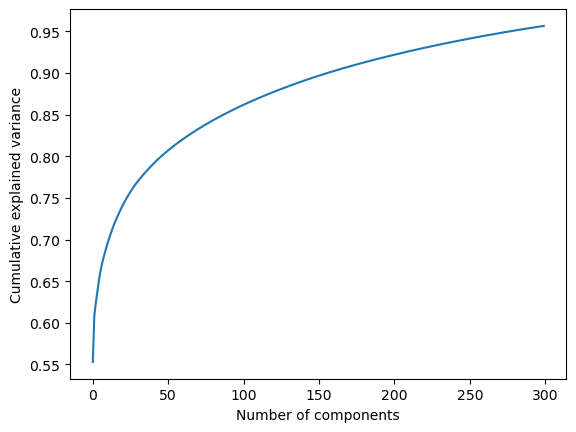

In [60]:
# Fit the TruncatedSVD on the training set
svd = TruncatedSVD(n_components= 300, n_iter= 5, algorithm='randomized', random_state=0)
X_train_svd = svd.fit_transform(X_train)
X_val_svd = svd.transform(X_val)
X_test_svd = svd.transform(X_test)

# Plot the explained variance ratio
cumulative_var_ratio = np.cumsum(svd.explained_variance_ratio_)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [40]:
# # Determine optimal n_components using TruncatedSVD
# n_components = np.argmax(cumulative_var_ratio > 0.95) + 1
# print(n_components)

1


In [28]:
# Fit the TruncatedSVD sets on logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr_svd = LogisticRegression()

# Fit the model on the training set
lr_svd.fit(X_train_svd, y_train)

# Make predictions on the validation set
y_pred_svd = lr_svd.predict(X_val_svd)

# Compute accuracy score
accuracy_score(y_val, y_pred_svd)
print('Accuracy score: ', accuracy_score(y_val, y_pred_svd))

# Print classification report
classification_report(y_val, y_pred_svd, target_names=['Not fake', 'Fake'], output_dict=True)
print('Classification report: ', classification_report(y_val, y_pred_svd, target_names=['Not fake', 'Fake']))

Accuracy score:  0.6195475688959101
Classification report:                precision    recall  f1-score   support

    Not fake       0.66      0.52      0.58     46626
        Fake       0.59      0.72      0.65     44526

    accuracy                           0.62     91152
   macro avg       0.63      0.62      0.62     91152
weighted avg       0.63      0.62      0.62     91152



In [59]:
# Print number of dimensions after vectorization
feauture_names = vectorizer.get_feature_names_out()
print('Number of dimensions after vectorization:', len(feauture_names))

Number of dimensions after vectorization: 546


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a logistic regression model
lr = LogisticRegression()

# Fit the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lr.predict(X_val)

# Calculate the accuracy score
accuracy_score(y_val, y_pred)
print('Accuracy score: ', accuracy_score(y_val, y_pred))

# Use classification report to get precision, recall, f1-score and support
classification_report(y_val, y_pred, output_dict=True)
print('Classification report: ', classification_report(y_val, y_pred))

c:\Users\marku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.9214827979638406
Classification report:                precision    recall  f1-score   support

           0       0.90      0.96      0.93     46626
           1       0.95      0.88      0.92     44526

    accuracy                           0.92     91152
   macro avg       0.92      0.92      0.92     91152
weighted avg       0.92      0.92      0.92     91152



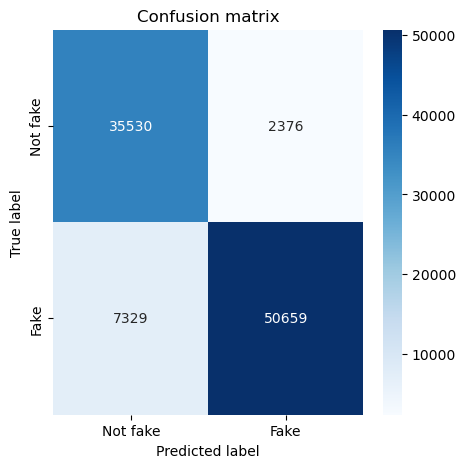

In [10]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(y_val, y_pred)

# Plot confusion matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes):
    confusion_matrix = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(confusion_matrix(y_val, y_pred), ['Not fake', 'Fake'])

In [16]:
# Dimensionality reduction with Truncated SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, n_iter=10, random_state=0)
svd.fit(X_train)

# Transform the training set
X_train_svd = svd.transform(X_train)

# Transform the validation set
X_val_svd = svd.transform(X_val)

# Transform the test set
X_test_svd = svd.transform(X_test)

# Train a logistic regression model
lr_svd = LogisticRegression(class_weight='balanced', max_iter=2500, C=0.1)

# Fit the model on the training set
lr_svd.fit(X_train_svd, y_train)

# Make predictions on the validation set
y_pred_svd = lr_svd.predict(X_val_svd)

# Calculate the accuracy score
accuracy_score(y_val, y_pred_svd)
print('Accuracy score: ', accuracy_score(y_val, y_pred_svd))

# Classification report
classification_report(y_val, y_pred_svd, output_dict=True)
print('Classification report: ', classification_report(y_val, y_pred_svd))

Accuracy score:  0.744686841721067
Classification report:                precision    recall  f1-score   support

           0       0.64      0.83      0.72     37906
           1       0.86      0.69      0.77     57988

    accuracy                           0.74     95894
   macro avg       0.75      0.76      0.74     95894
weighted avg       0.77      0.74      0.75     95894



In [14]:
import pandas as pd
from tqdm import tqdm

# Read the first 2000000 rows in chunks of 10000, and write to a csv file called 2mio-raw.csv. Include progress bar (tqdm).
chunksize = 10000
filename = 'news_cleaned_2018_02_13.csv'
output_file = '2mio-raw.csv'

tqdm.pandas()

for i, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize, lineterminator='\n')):
    # Handle buffer overflow and possible malformed input file
    try:
        # Accumulate chunks until the total number of rows is 2000000
        print('Processing chunk', i+1)
        if i == 0:
            chunk.to_csv(output_file, index=False)
        else:
            chunk.to_csv(output_file, index=False, header=False, mode='a')
        # Terminates the loop when the total number of rows is 2000000
        if chunksize*(i+1) >= 2000000:
            break

    except:
        print('Error in chunk', i+1)
        pass

    tqdm.write(f"{chunksize*(i+1)} rows processed. The total number of articles processed so far is {chunksize * (i + 1)}")

Processing chunk 1
10000 rows processed. The total number of articles processed so far is 10000
Processing chunk 2
20000 rows processed. The total number of articles processed so far is 20000
Processing chunk 3
30000 rows processed. The total number of articles processed so far is 30000
Processing chunk 4
40000 rows processed. The total number of articles processed so far is 40000
Processing chunk 5
50000 rows processed. The total number of articles processed so far is 50000
Processing chunk 6
60000 rows processed. The total number of articles processed so far is 60000
Processing chunk 7
70000 rows processed. The total number of articles processed so far is 70000
Processing chunk 8
80000 rows processed. The total number of articles processed so far is 80000
Processing chunk 9
90000 rows processed. The total number of articles processed so far is 90000
Processing chunk 10
100000 rows processed. The total number of articles processed so far is 100000
Processing chunk 11
110000 rows proce

In [26]:
chunksize = 10000
filename = '2mio-raw.csv'
output_file = 'df2_clean_tok_stop_stem.csv'

tqdm.pandas()

for i, chunk in enumerate(pd.read_csv(filename, chunksize=chunksize)):
    print('Processing chunk', i+1)
    chunk['content'] = chunk['content'].apply(cleaningTime).apply(Tokenize).apply(Remove_stopwords).apply(Stemming_Words)
    if i == 0:
        chunk.to_csv(output_file, index=False)
    else:
        chunk.to_csv(output_file, index=False, header=False, mode='a')
    
    tqdm.write(f"{chunksize*(i+1)} rows processed. The total number of articles processed so far is {chunksize * (i + 1)}")

Processing chunk 1
10000 rows processed. The total number of articles processed so far is 10000
Processing chunk 2
20000 rows processed. The total number of articles processed so far is 20000
Processing chunk 3
30000 rows processed. The total number of articles processed so far is 30000
Processing chunk 4
40000 rows processed. The total number of articles processed so far is 40000
Processing chunk 5
50000 rows processed. The total number of articles processed so far is 50000
Processing chunk 6
60000 rows processed. The total number of articles processed so far is 60000
Processing chunk 7
70000 rows processed. The total number of articles processed so far is 70000
Processing chunk 8
80000 rows processed. The total number of articles processed so far is 80000
Processing chunk 9
90000 rows processed. The total number of articles processed so far is 90000
Processing chunk 10
100000 rows processed. The total number of articles processed so far is 100000
Processing chunk 11
110000 rows proce

In [15]:
import pandas as pd

df2 = pd.read_csv('df2_clean_tok_stop_stem.csv')

C:\Users\marku\AppData\Local\Temp\ipykernel_12120\3081287300.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('df2_clean_tok_stop_stem.csv')


In [16]:
df2.drop('id', inplace=True, axis=1)
df2.drop('inserted_at', inplace=True, axis=1)
df2.drop('scraped_at', inplace=True, axis=1)
df2.drop('updated_at', inplace=True, axis=1)
df2.drop('summary', inplace=True, axis=1)
df2.drop('tags', inplace=True, axis=1)
df2.drop('source', inplace=True, axis=1)

# Remove articles with missing 'type' values
df2 = df2[df2['type'].notna()]

# Remove articles with 'type' values = 'unknown'
df2 = df2[df2['type'] != 'unknown']

In [57]:
# Print number of duplicates
print("Number of duplicates: ", df2.duplicated(subset=['title', 'content']).sum())

Number of duplicates:  196915


In [17]:
# Remove duplicate articles based on 'title' and 'content' columns
df2.drop_duplicates(subset=['title', 'content'], inplace=True)

# Print sum of articles for all types
print("Total # of articles: ", df2['type'].value_counts().sum())

Total # of articles:  1551222


In [18]:
# Make a new column 'label' and assign 1 to all rows with 'type' = 'fake' or 'conspiracy' or 'junksci' or 'hate' or 'unreliable' or 'rumor' and 0 to all other rows
df2['label'] = df2['type'].apply(lambda x: 1 if x in ['fake', 'conspiracy', 'junksci', 'hate', 'unreliable', 'rumor'] else 0)

In [19]:
# Split the data into training, validation and test sets
train_set = df2.sample(frac=0.8, random_state=0)
new_df2 = df2.drop(train_set.index)
validation_set = new_df2.sample(frac=0.5, random_state=0)
test_set = new_df2.drop(validation_set.index)

print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(1240978, 11)
(155122, 11)
(155122, 11)


In [16]:
# Calculate number of unique words in content column
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return len(UN)

print("Number of unique words in content column: ", unique_words(df2['content']))

Number of unique words in content column:  691


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Fit the vectorizer on the training set
X_train = vectorizer.fit_transform(train_set['content'])
y_train = train_set['label']

# Fit the vectorizer on the validation set
X_val = vectorizer.transform(validation_set['content'])
y_val = validation_set['label']

# Fit the vectorizer on the test set
X_test = vectorizer.transform(test_set['content'])
y_test = test_set['label']

In [21]:
# # Use TF-IDF to transform the data
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(sublinear_tf=True, use_idf=True)

# Fit the transformer on the training set
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
# y_train = train_set['label']

# Fit the transformer on the validation set
X_val_tfidf = tfidf_transformer.transform(X_val)
# y_val = validation_set['content']

# Fit the transformer on the test set
X_test_tfidf = tfidf_transformer.transform(X_test)
# y_test = test_set['label']

In [29]:
# Train a Naive Bayes classifier with tf-idf data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Predict the labels for the validation set
predicted = clf.predict(X_val_tfidf)

# Calculate the accuracy of the model
accuracy_score(y_val, predicted)
print("Accuracy: ", accuracy_score(y_val, predicted))

# Print the classification report
classification_report(y_val, predicted)
print("Classification report: ", classification_report(y_val, predicted))

# Print number of features
print("Number of features: ", clf.n_features_in_)

Accuracy:  0.8122510024367917
Classification report:                precision    recall  f1-score   support

           0       0.75      0.97      0.84     80114
           1       0.95      0.65      0.77     75008

    accuracy                           0.81    155122
   macro avg       0.85      0.81      0.81    155122
weighted avg       0.84      0.81      0.81    155122

Number of features:  1969872


In [22]:
# Try SVM model on the training set with TF-IDF data
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm = LinearSVC(random_state=0).fit(X_train_tfidf, y_train)

# Predict the labels for the validation set
predicted = svm.predict(X_val_tfidf)

# Print number of features
print("Number of features: ", svm.n_features_in_)

# Calculate the accuracy of the model
accuracy_score(y_val, predicted)
print("Accuracy: ", accuracy_score(y_val, predicted))

# Print the classification report
classification_report(y_val, predicted)
print("Classification report: ", classification_report(y_val, predicted))

Number of features:  1969872
Accuracy:  0.9178710950090896
Classification report:                precision    recall  f1-score   support

           0       0.90      0.94      0.92     80114
           1       0.93      0.89      0.91     75008

    accuracy                           0.92    155122
   macro avg       0.92      0.92      0.92    155122
weighted avg       0.92      0.92      0.92    155122



In [9]:
# Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LogRegFinal = LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000)

# Fit the model on the training set
LogRegFinal.fit(X_train, y_train)

# Predict the labels of the validation set
y_pred = LogRegFinal.predict(X_val)

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_val, y_pred))

# Print the classification report
classification_report(y_val, y_pred, output_dict=True)
print("Classification report: ", classification_report(y_val, y_pred))

c:\Users\marku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.8985314784492207
Classification report:                precision    recall  f1-score   support

           0       0.88      0.93      0.90     80114
           1       0.92      0.87      0.89     75008

    accuracy                           0.90    155122
   macro avg       0.90      0.90      0.90    155122
weighted avg       0.90      0.90      0.90    155122



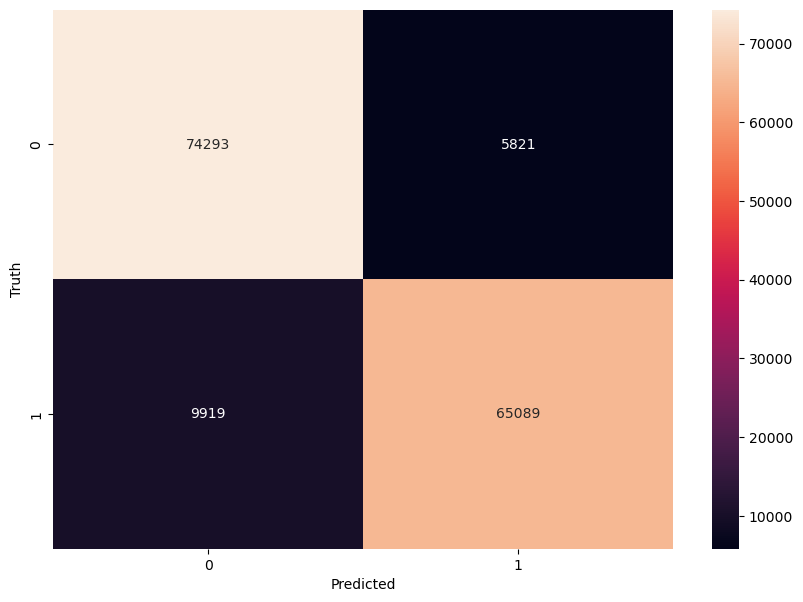

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [23]:
# Predict the labels of the test set (SVM)
y_pred = svm.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy score: ", accuracy_score(y_test, y_pred))

# Print the classification report
classification_report(y_test, y_pred)
print("Classification report: ", classification_report(y_test, y_pred))

Accuracy score:  0.9182514408014337
Classification report:                precision    recall  f1-score   support

           0       0.90      0.94      0.92     79890
           1       0.94      0.89      0.91     75232

    accuracy                           0.92    155122
   macro avg       0.92      0.92      0.92    155122
weighted avg       0.92      0.92      0.92    155122



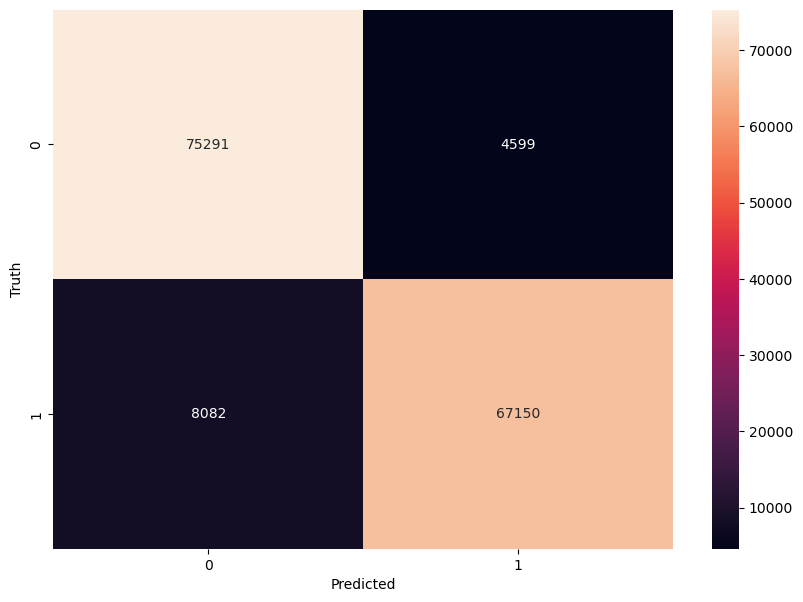

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for test set (SVM)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Get content from LIAR dataset
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

# Get content from Politifact dataset
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

# Get wget from GNU for windows
https://eternallybored.org/misc/wget/

In [13]:
# Load test.tsv file
import pandas as pd

dftsv = pd.read_csv('test.tsv', sep='\t', header=None)
dftsv.head()

# # # Print statement column for first article
# print(dftsv[2][0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [32]:
# Print contents of first article of df2
print(df2['content'][0])

# Print number of unique words in first article of df2
print(len(df2['content'][0].split()))

# Make a unique word counter for all articles in df2
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return len(UN)

print("Number of unique words in content column: ", unique_words(df2['content']))



['life', 'illus', 'least', 'quantum', 'level', 'theori', 'recent', 'confirm', 'set', 'research', 'final', 'mean', 'test', 'john', 'wheeler', 'delayedchoic', 'theori', 'conclud', 'physicist', 'right', 'number', 'mr', 'wheeler', 'propos', 'eperi', 'involv', 'move', 'object', 'given', 'choic', 'act', 'like', 'wave', 'particl', 'former', 'act', 'vibrat', 'frequenc', 'distinguish', 'wave', 'latter', 'frequenc', 'determin', 'posit', 'space', 'unlik', 'wave', 'point', 'decid', 'act', 'like', 'one', 'time', 'technolog', 'avail', 'conduct', 'strong', 'eperi', 'scientist', 'abl', 'carri']
61
Number of unique words in content column:  691
